#Data Source

In [9]:
import urllib.request

def get_data():
    import urllib.request

    odom_data_url = "https://raw.githubusercontent.com/rodrigodg1/inspection-framework/main/charts/odom.txt"
    response = urllib.request.urlopen(odom_data_url)
    odom_data = response.read().decode()

    imu_mag_data_url = "https://raw.githubusercontent.com/rodrigodg1/inspection-framework/main/charts/imu_mag.txt"
    response = urllib.request.urlopen(imu_mag_data_url)
    imu_mag_data = response.read().decode()

    imu_data_url = "https://raw.githubusercontent.com/rodrigodg1/inspection-framework/main/charts/imu_data.txt"
    response = urllib.request.urlopen(imu_data_url)
    imu_data = response.read().decode()

    imu_angular_velocity_url = "https://raw.githubusercontent.com/rodrigodg1/inspection-framework/main/charts/imu_angular.txt"
    response = urllib.request.urlopen(imu_angular_velocity_url)
    imu_angular_velocity = response.read().decode()

    return odom_data, imu_mag_data, imu_data, imu_angular_velocity


#Data Loading

In [3]:
odom_data, imu_mag_data, imu_data, imu_angular_velocity = get_data()

#Data Frame

In [4]:
import sys
import pandas as pd

def calculate_header_sizes(data,data_type):

    headers = data.strip().split('---')
    header_sizes = [sys.getsizeof(header) for header in headers if header]

    total_header_count = data.count('header:')
    print(f"{data_type} - Total number of 'header' keyword occurrences: {total_header_count}")

    header_sizes_df = pd.DataFrame(header_sizes)
    header_sizes_df.columns = ['Header Size']
    header_sizes_df.index.name = 'Header Index'
    print(f"{data_type} - Statistics")
    print(header_sizes_df.describe())
    print("\n")

    return header_sizes_df

odom_data, imu_mag_data, imu_data, imu_angular_velocity = get_data()

odom_header_sizes_df = calculate_header_sizes(odom_data,"Odometry")
imu_data_header_sizes_df = calculate_header_sizes(imu_data,"IMU_Data")
imu_mag_header_sizes_df = calculate_header_sizes(imu_mag_data,"IMU_Mag")
imu_angularv_header_sizes_df = calculate_header_sizes(imu_angular_velocity,"IMU_AngularV")


Odometry - Total number of 'header' keyword occurrences: 248
Odometry - Statistics
       Header Size
count   248.000000
mean    921.362903
std      14.895770
min     910.000000
25%     913.000000
50%     914.000000
75%     918.500000
max     952.000000


IMU_Data - Total number of 'header' keyword occurrences: 994
IMU_Data - Statistics
       Header Size
count   994.000000
mean    693.084507
std       3.392561
min     683.000000
25%     690.000000
50%     694.000000
75%     696.000000
max     701.000000


IMU_Mag - Total number of 'header' keyword occurrences: 4971
IMU_Mag - Statistics
       Header Size
count  4971.000000
mean    231.170992
std       1.498803
min     226.000000
25%     230.000000
50%     231.000000
75%     232.000000
max     236.000000


IMU_AngularV - Total number of 'header' keyword occurrences: 994
IMU_AngularV - Statistics
       Header Size
count   994.000000
mean    234.062374
std       2.294117
min     226.000000
25%     233.000000
50%     234.000000
75%     2

#ROS Messages Size (Transaction Data)

In [ ]:
'''
import sys
import matplotlib.pyplot as plt


def calculate_block_sizes(data):
    header_blocks = data.strip().split('---')
    header_sizes = []
 

    for block in header_blocks:
        if block:
            header_sizes.append(sys.getsizeof(block))

    
    print(f"Total Records: {len(header_sizes)}" )
    print(header_sizes)

    return header_sizes

def plot_box_plot(header_sizes_list, file_names):
    #plt.style.use('seaborn-white')  # Change the box plot style
    fig, ax = plt.subplots(figsize=(14, 8))  # Adjust the figure size
    ax.boxplot(header_sizes_list, labels=file_names, widths=0.5)
    #ax.set_title('Merkle Tree Leaf Hash', fontsize=20)
    #ax.set_title('ROS messages', fontsize=20)
    ax.set_ylabel('Size in Bytes', fontsize=20)
    ax.tick_params(axis='both', labelsize=18)
    ax.grid(axis='y')  # Add gridlines

    plt.show()

#get the data
odom_data, imu_mag_data, imu_data, imu_angular_velocity = get_data()

file_names = [odom_data, imu_mag_data, imu_data,imu_angular_velocity]
file_labels = {
    odom_data : 'Odometry',
    imu_mag_data : 'IMU Magnetometer',
    imu_data: 'IMU Data',
    imu_angular_velocity: 'IMU Angular Velocity',
}

header_sizes_list = []
labels = []

for file_name in file_names:
    data = file_name
    header_sizes = calculate_block_sizes(data)
    header_sizes_list.append(header_sizes)
    labels.append(file_labels[file_name])


#print(header_sizes_list[0])

plot_box_plot(header_sizes_list, labels)

'''

# File Sizes Charts Separetely

Total Records: 248
[912, 913, 950, 913, 913, 913, 913, 913, 913, 914, 914, 914, 914, 914, 914, 914, 914, 914, 914, 914, 914, 914, 914, 914, 914, 914, 914, 914, 914, 914, 914, 914, 947, 949, 913, 913, 913, 913, 913, 913, 913, 913, 913, 913, 913, 913, 913, 913, 913, 913, 913, 913, 913, 913, 913, 913, 913, 950, 914, 949, 913, 913, 913, 913, 913, 913, 913, 913, 913, 952, 914, 914, 914, 914, 914, 914, 914, 914, 914, 948, 912, 912, 912, 912, 948, 912, 912, 912, 949, 913, 913, 913, 913, 913, 913, 913, 913, 913, 951, 914, 914, 914, 914, 914, 948, 952, 914, 914, 914, 914, 914, 914, 914, 914, 914, 914, 914, 914, 914, 914, 949, 913, 913, 952, 950, 913, 930, 912, 912, 951, 914, 914, 948, 912, 912, 912, 912, 912, 951, 933, 914, 914, 914, 914, 914, 914, 914, 914, 914, 914, 914, 914, 914, 914, 949, 949, 912, 912, 912, 947, 911, 911, 911, 911, 911, 948, 912, 912, 912, 912, 912, 912, 912, 912, 949, 951, 915, 915, 915, 915, 915, 915, 915, 951, 931, 913, 951, 914, 933, 950, 913, 913, 951, 951, 951, 949, 

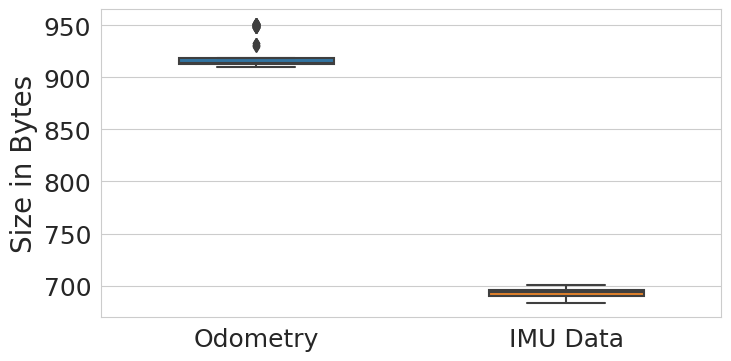

Total Records: 4971
[226, 228, 228, 229, 230, 229, 228, 228, 227, 229, 228, 229, 228, 228, 229, 227, 230, 229, 229, 229, 230, 228, 229, 228, 229, 229, 229, 227, 230, 229, 230, 228, 229, 227, 229, 229, 229, 229, 229, 226, 230, 229, 228, 227, 229, 229, 229, 230, 228, 229, 228, 229, 228, 227, 229, 229, 229, 230, 229, 230, 229, 228, 229, 229, 228, 229, 229, 228, 228, 229, 228, 228, 228, 228, 228, 228, 226, 229, 230, 229, 227, 228, 228, 228, 226, 230, 228, 228, 230, 229, 230, 230, 229, 230, 230, 230, 231, 231, 230, 230, 230, 230, 229, 229, 230, 229, 230, 228, 229, 230, 231, 230, 231, 229, 230, 231, 229, 228, 230, 231, 230, 230, 230, 229, 230, 230, 231, 229, 231, 229, 231, 229, 229, 230, 226, 231, 230, 231, 231, 228, 230, 231, 229, 230, 228, 229, 230, 231, 229, 229, 231, 230, 229, 229, 231, 231, 229, 230, 231, 229, 230, 229, 229, 230, 228, 231, 231, 231, 229, 230, 229, 230, 230, 229, 229, 231, 230, 226, 231, 230, 231, 228, 229, 227, 226, 230, 229, 229, 230, 230, 230, 230, 231, 229, 230, 229,

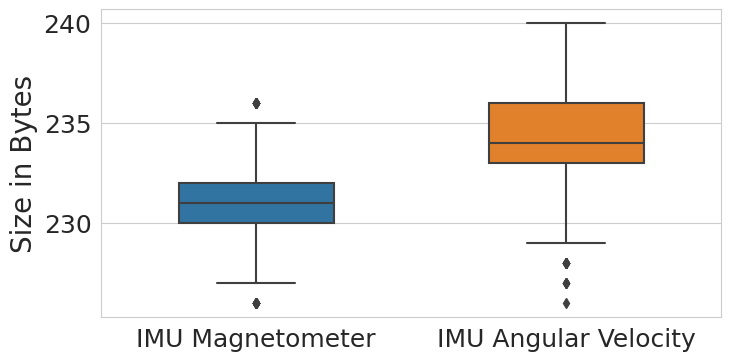

In [14]:
import sys
import matplotlib.pyplot as plt
import seaborn as sns


def calculate_block_sizes(data):
    header_blocks = data.strip().split('---')
    header_sizes = []

    for block in header_blocks:
        if block:
            header_sizes.append(sys.getsizeof(block))

    print(f"Total Records: {len(header_sizes)}")
    print(header_sizes)

    return header_sizes


def plot_box_plot(header_sizes_list, file_names):
    sns.set_style("whitegrid")  # Set Seaborn style
    fig, ax = plt.subplots(figsize=(8, 4))
    sns.boxplot(data=header_sizes_list, width=0.5, ax=ax)  # Use Seaborn boxplot
    ax.set_xticklabels(file_names)  # Set x-axis labels
    ax.set_ylabel('Size in Bytes', fontsize=20)
    ax.tick_params(axis='both', labelsize=18)

    plt.show()


# Get the data
odom_data, imu_mag_data, imu_data, imu_angular_velocity = get_data()

# Define the data groups for the two charts
chart1_data = [odom_data, imu_data]
chart2_data = [imu_mag_data, imu_angular_velocity]

file_labels = {
    odom_data: 'Odometry',
    imu_mag_data: 'IMU Magnetometer',
    imu_data: 'IMU Data',
    imu_angular_velocity: 'IMU Angular Velocity',
}

# Function to prepare data for plotting
def prepare_plot_data(data_group):
    header_sizes_list = []
    labels = []

    for file_name in data_group:
        data = file_name
        header_sizes = calculate_block_sizes(data)
        header_sizes_list.append(header_sizes)
        labels.append(file_labels[file_name])

    return header_sizes_list, labels


# Prepare and plot data for the two charts
chart1_sizes, chart1_labels = prepare_plot_data(chart1_data)
plot_box_plot(chart1_sizes, chart1_labels)

chart2_sizes, chart2_labels = prepare_plot_data(chart2_data)
plot_box_plot(chart2_sizes, chart2_labels)


#Merkle Tree Leaf Hash Time

In [15]:
!pip install merkletools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.2/829.2 kB 14.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for merkletools: filename=merkletools-1.0.3-py3-none-any.whl size=5901 sha256=bd52c0a9d0ec39f8a02a6fbe05079356f564a09b97c4c4255487296e33b05488
  Stored in directory: /root/.cache/pip/wheels/a1/a4/2f/8a9603ca4c55e25a99d1eb609a2a43b95bc9104897c1a36b5e
  Created wheel for pysha3: filename=pysha3-1.0.2-cp39-cp39-linux_x86_64.whl size=152333 sha256=d82d76a12aa5be472d1d081ced7535814fe441f5b59418c646e8e75283acae17
  Stored in directory: /root/.cache/pip/wheels/17/9d/00/86e22a32b0109bd3c8797adf13a74427aa38e6ad1135633d50
Successfully built merkletools pysha3


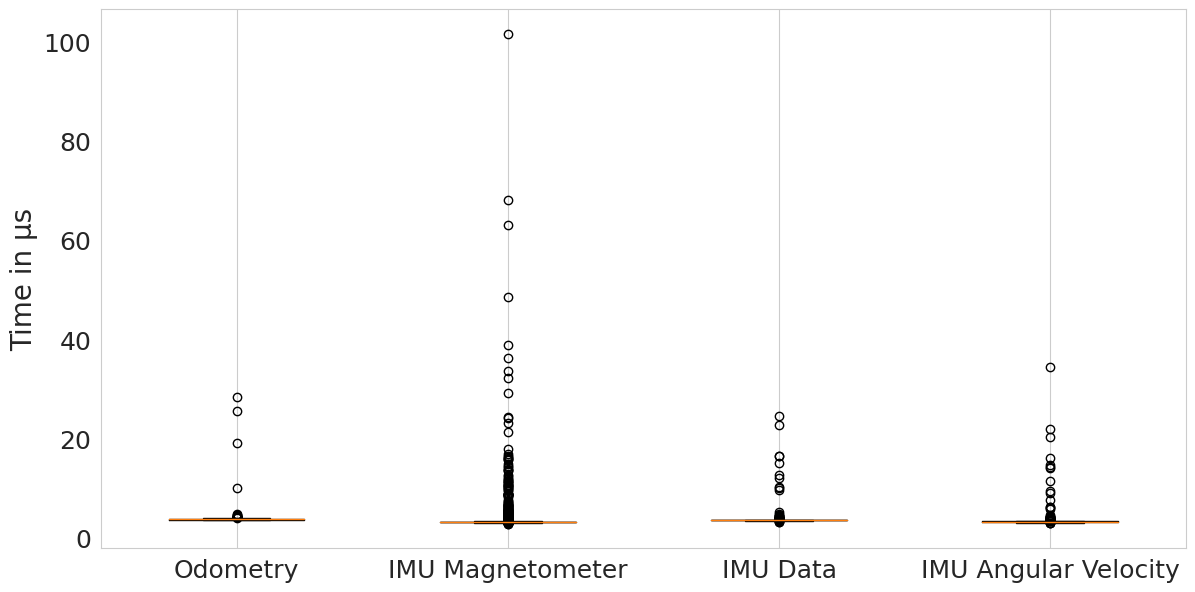

In [28]:
import sys
import matplotlib.pyplot as plt
from merkletools import MerkleTools
import time


def calculate_hash_time(data):
    mt = MerkleTools(hash_type="sha256")
    header_blocks = data.strip().split('---')
    header_times = []

    for block in header_blocks:
        if block:
            #get time
            start = time.process_time()
            mt.add_leaf(block, True)
            header_times.append((time.process_time() - start)*1000000)  
            
    #tree creation time
    #start = time.process_time()
    #mt.make_tree()
    #header_times.append((time.process_time() - start)*1e6) #last append == tree creation time
            
    return header_times
    
def plot_box_plot(header_sizes_list, file_names):
    #plt.style.use('seaborn-white')  # Change the box plot style
    fig, ax = plt.subplots(figsize=(14, 7))  # Adjust the figure size
    ax.boxplot(header_sizes_list, labels=file_names, widths=0.5)
    #ax.set_title('Merkle Tree Leaf Hash', fontsize=20)
    ax.set_ylabel('Time in µs', fontsize=20)
    ax.tick_params(axis='both', labelsize=18)
    ax.grid(axis='y')  # Add gridlines

    plt.savefig("merkle-tree-leaf-time" + ".pdf", bbox_inches='tight') # Save the plot as a PDF
    plt.show()

#get the data
odom_data, imu_mag_data, imu_data, imu_angular_velocity = get_data()

file_names = [odom_data, imu_mag_data, imu_data,imu_angular_velocity]
file_labels = {
    odom_data : 'Odometry',
    imu_mag_data : 'IMU Magnetometer',
    imu_data: 'IMU Data',
    imu_angular_velocity: 'IMU Angular Velocity',
}

header_hashes_list = []
labels = []

#reads all files
for file_name in file_names:
    data = file_name
    #vector with hash calculation times
    header_hash_time = calculate_hash_time(data)
    #print(header_hash_time)
    header_hashes_list.append(header_hash_time)
    labels.append(file_labels[file_name])
    
plot_box_plot(header_hashes_list, labels)
    
